In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve

In [5]:
# Datos
cars = pd.read_csv('mtcars.csv')
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
# Estructura
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [7]:
X = cars['wt'].values.reshape(-1,1)
y = cars['mpg'].values

In [8]:
print(f'Shape X: {X.shape}')
print(f'Shape y: {y.shape}')

Shape X: (32, 1)
Shape y: (32,)


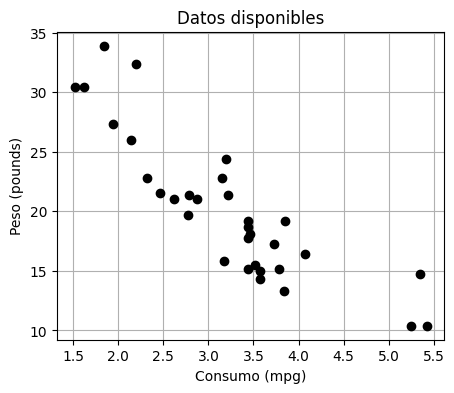

In [9]:
# Gráfica de datos de entrenamiento, validación y recta de regresión
plt.figure(figsize=(5,4))
plt.scatter(X, y, color='black', label='Datos', zorder=3)
plt.xlabel('Consumo (mpg)')
plt.ylabel('Peso (pounds)')
plt.title('Datos disponibles')
plt.grid(True)
plt.show()

In [10]:
degrees = 6
mse_train_vals = []
mse_cv_vals = []

for degree in range(1, degrees + 1):
    # Crear pipeline
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree)),
        ('scaler', StandardScaler()),   # Estandarización
        ('reg', LinearRegression())
    ])

    # Ajustar el modelo
    pipeline.fit(X, y)

    # Predecir y calcular errores
    y_pred = pipeline.predict(X)

    mse_train = mean_squared_error(y, y_pred)
    mse_cv = -np.mean(cross_val_score(pipeline, X, y, cv=32, scoring='neg_mean_squared_error'))

    mse_train_vals.append(mse_train)
    mse_cv_vals.append(mse_cv)

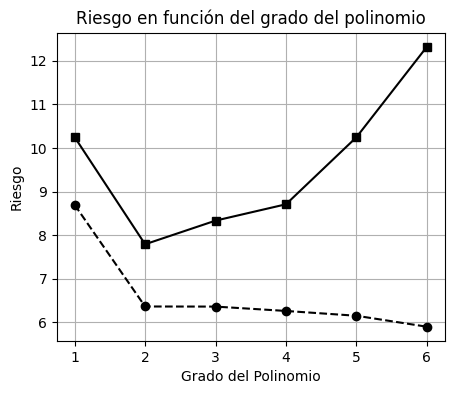

In [11]:
# Gráfica de evolución de MSE con grado del polinomio
plt.figure(figsize=(5,4))
plt.plot(range(1, degrees + 1), mse_train_vals, label='Entrenamiento', color='black', marker ='o', linestyle='--')
plt.plot(range(1, degrees + 1), mse_cv_vals, label='CV', color='black', marker ='s', linestyle='-')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Riesgo')
plt.grid(True)
plt.xticks(range(1, degrees + 1))
plt.title('Riesgo en función del grado del polinomio')
plt.show()

In [12]:
alphas = np.logspace(-6,6,50)

In [13]:
# Definimos el algoritmo

degree = 6

model = Pipeline(
    steps=[
        ('poly', PolynomialFeatures(degree)),
        ('scaler', StandardScaler()),   # Estandarización
        ('reg', Ridge())
    ]
)

In [14]:
# Definimos la métrica que vamos a usar
metrica = make_scorer(mean_squared_error)

In [15]:
# Validation curve
train_scores, valid_scores = validation_curve(model,
                                              X,
                                              y,
                                              param_name = 'reg__alpha',
                                              param_range = alphas,
                                              cv=32,
                                              scoring = metrica,
                                              verbose = 1
                                             )

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    2.3s


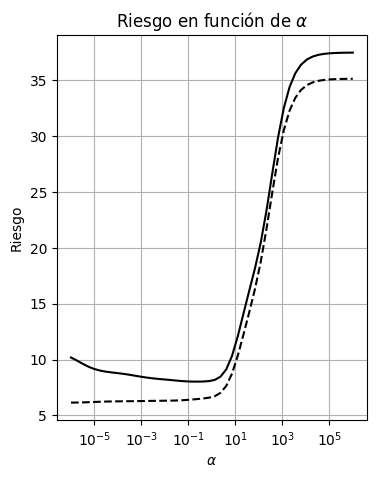

In [16]:
# Graficamos los scores y sus variabilidad

# Train
train_scores_mean = np.mean(train_scores, axis=1)

# Validation
valid_scores_mean = np.mean(valid_scores, axis=1)

# Ploteamos
plt.figure(figsize=(4, 5))
plt.plot(alphas, train_scores_mean, color='black', linestyle='--')

plt.plot(alphas, valid_scores_mean, color='black', linestyle='-')

plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.ylabel('Riesgo')
plt.title(r'Riesgo en función de $\alpha$')
plt.grid(True)
plt.show()